<a href="https://colab.research.google.com/github/amandasgonsalves/C-studying/blob/main/SVM_ultima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.impute import SimpleImputer


# Montar o Google Drive
drive.mount('/content/drive')

# Montar o drive e carregar os dados
file_path = '/content/drive/MyDrive/sei_IA.xlsx'
planilha1 = 'Relacao_Alunos'
planilha2 = 'Historico'

relacao_alunos = pd.read_excel(file_path, skiprows=2, sheet_name=planilha1)
historico = pd.read_excel(file_path, skiprows=2, sheet_name=planilha2)

Mounted at /content/drive


In [2]:
# Ler os dados das planilhas
relacao_alunos = pd.read_excel(file_path, skiprows=2, sheet_name=planilha1)
planilha2 = 'Historico'
historico = pd.read_excel(file_path, skiprows=2, sheet_name=planilha2)

In [3]:
# Selecionar variáveis relevantes
relacao_alunos = relacao_alunos[['id', 'Idade', 'Coeficiente', 'Nota Enem', 'Sexo',
                                 'Período Desistências','Escola Pública?',
                                 'Situação Atual do Aluno', 'Curso',
                                 'Tipo de Cota']]

historico = historico[['id', 'Nota']]

# Integrar os dados das duas abas
merged_df = pd.merge(relacao_alunos, historico, on='id', how='left')

# Verificar as colunas do DataFrame após o merge
print("Colunas no DataFrame após o merge:")
print(merged_df.columns)
print("Número de linhas após o merge:", merged_df.shape[0])

Colunas no DataFrame após o merge:
Index(['id', 'Idade', 'Coeficiente', 'Nota Enem', 'Sexo',
       'Período Desistências', 'Escola Pública?', 'Situação Atual do Aluno',
       'Curso', 'Tipo de Cota', 'Nota'],
      dtype='object')
Número de linhas após o merge: 57329


In [4]:
merged_df.head(232)

,id,Idade,Coeficiente,Nota Enem,Sexo,Período Desistências,Escola Pública?,Situação Atual do Aluno,Curso,Tipo de Cota,Nota
0,+bwsow,37,0.0222,634.3,M,1.0,Escola Pública,Desistente,Ciência Da Computação,Cotista,0.0
1,+bwsow,37,0.0222,634.3,M,1.0,Escola Pública,Desistente,Ciência Da Computação,Cotista,0.0
2,+bwsow,37,0.0222,634.3,M,1.0,Escola Pública,Desistente,Ciência Da Computação,Cotista,0.0
3,+bwsow,37,0.0222,634.3,M,1.0,Escola Pública,Desistente,Ciência Da Computação,Cotista,1.0
4,+bwsow,37,0.0222,634.3,M,1.0,Escola Pública,Desistente,Ciência Da Computação,Cotista,0.0
...,...,...,...,...,...,...,...,...,...,...,...
227,u68+bz,45,0.4841,700.6,F,2.0,Escola Pública,Desistente,Ciência Da Computação,Cotista,3.1
228,u68+bz,45,0.4841,700.6,F,2.0,Escola Pública,Desistente,Ciência Da Computação,Cotista,0.0
229,u68+bz,45,0.4841,700.6,F,2.0,Escola Pública,Desistente,Ciência Da Computação,Cotista,8.7
230,u68+bz,45,0.4841,700.6,F,2.0,Escola Pública,Desistente,Ciência Da Computação,Cotista,9.7


In [5]:
# One-Hot Encoding para variáveis categóricas
categorical_columns = ['Sexo']
merged_df = pd.get_dummies(merged_df, columns=categorical_columns, drop_first=True)

In [6]:
# Ajustar valores conforme as especificações
if 'Período Desistências' in merged_df.columns:
    merged_df['Período Desistências'] = merged_df['Período Desistências'].apply(lambda x: 0 if pd.isnull(x) else (1 if x in [1, 2] else x))
else:
    print("A coluna 'Período Desistências' não está presente no DataFrame.")

In [7]:
# Escola Pública? (Transformação solicitada)
if 'Escola Pública?' in merged_df.columns:
    # Mapear 'escola pública' para 0 e 'escola privada' para 1
    merged_df['Escola_Publica_new'] = merged_df['Escola Pública?'].apply(lambda x: 0 if x == 'Escola Pública' else 1)
    # Remover a coluna original após a codificação
    merged_df.drop(columns=['Escola Pública?'], inplace=True)
else:
    print("A coluna 'Escola Pública?' não está presente no DataFrame.")

In [8]:
# curso
if 'Curso' in merged_df.columns:

    merged_df['curso_new'] = merged_df['Curso'].apply(lambda x: 0 if x == 'Curso Superior De Tecnologia Em Análise E Desenvolvimento De Sistemas' else 1)
    # Remover a coluna original após a codificação
    merged_df.drop(columns=['Curso'], inplace=True)
else:
    print("A coluna 'Ciência da Computação' não está presente no DataFrame.")

In [9]:
# curso
if 'Situação Atual do Aluno' in merged_df.columns:

    merged_df['Situação Atual do Aluno_new'] = merged_df['Situação Atual do Aluno'].apply(lambda x: 0 if x == 'Desistente' else 1)
    # Remover a coluna original após a codificação
    merged_df.drop(columns=['Situação Atual do Aluno'], inplace=True)
else:
    print("A coluna 'Ciência da Computação' não está presente no DataFrame.")

In [10]:
if 'Tipo de Cota' in merged_df.columns:

    merged_df['Tipo de Cota_new'] = merged_df['Tipo de Cota'].apply(lambda x: 0 if x == 'Ampla concorrência' else 1)
    # Remover a coluna original após a codificação
    merged_df.drop(columns=['Tipo de Cota'], inplace=True)
else:
    print("A coluna 'Ciência da Computação' não está presente no DataFrame.")

In [11]:
merged_df.head(50)

,id,Idade,Coeficiente,Nota Enem,Período Desistências,Nota,Sexo_M,Escola_Publica_new,curso_new,Situação Atual do Aluno_new,Tipo de Cota_new
0,+bwsow,37,0.0222,634.3,1,0.0,True,0,1,0,1
1,+bwsow,37,0.0222,634.3,1,0.0,True,0,1,0,1
2,+bwsow,37,0.0222,634.3,1,0.0,True,0,1,0,1
3,+bwsow,37,0.0222,634.3,1,1.0,True,0,1,0,1
4,+bwsow,37,0.0222,634.3,1,0.0,True,0,1,0,1
5,+bwsow,37,0.0222,634.3,1,0.0,True,0,1,0,1
6,f511wn,27,0.1852,623.2,1,1.4,True,1,1,0,0
7,f511wn,27,0.1852,623.2,1,2.1,True,1,1,0,0
8,f511wn,27,0.1852,623.2,1,1.3,True,1,1,0,0
9,f511wn,27,0.1852,623.2,1,1.0,True,1,1,0,0


In [12]:
# Contar quantas linhas têm o valor 0 na coluna 'Período Desistências'
num_zero_desistencias = (merged_df['Período Desistências'] == 0).sum()

print("Número de linhas com 0 na coluna 'Período Desistências':", num_zero_desistencias)


Número de linhas com 0 na coluna 'Período Desistências': 14486


In [13]:
# Remover duplicatas baseadas na coluna 'id'
merged_df = merged_df.drop_duplicates(subset='id')

In [14]:
# Contar quantas linhas têm o valor 0 na coluna 'Período Desistências'
num_zero_desistencias = (merged_df['Período Desistências'] == 1).sum()

print("Número de linhas com 0 na coluna 'Período Desistências':", num_zero_desistencias)


Número de linhas com 0 na coluna 'Período Desistências': 1394


In [15]:
merged_df.head(232)

,id,Idade,Coeficiente,Nota Enem,Período Desistências,Nota,Sexo_M,Escola_Publica_new,curso_new,Situação Atual do Aluno_new,Tipo de Cota_new
0,+bwsow,37,0.02220,634.3,1,0.0,True,0,1,0,1
6,f511wn,27,0.18520,623.2,1,1.4,True,1,1,0,0
12,gwhga8,39,0.16440,588.9,1,1.0,True,0,1,0,1
18,t5fkjk,30,0.00000,683.2,1,0.0,False,1,1,0,0
20,3ewz5c,27,0.25590,650.5,1,2.7,True,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
10133,st99wn,27,0.54540,530.6,0,7.0,True,0,1,1,1
10236,4xr1nz,26,0.51570,521.7,0,9.1,False,0,1,1,1
10339,oit99t,28,0.42430,629.8,0,6.1,True,0,1,1,1
10445,uby+9t,24,0.63556,582.8,1,9.3,True,1,1,0,0


In [16]:
print("Número de linhas após o merge:", merged_df.shape[0])

Número de linhas após o merge: 1888


In [17]:
# Limpeza de dados
def clean_column(column):
    merged_df[column] = pd.to_numeric(merged_df[column], errors='coerce')

numeric_columns = ['Coeficiente', 'Nota', 'Nota Enem', 'Período Desistências', 'Idade']
for column in numeric_columns:
    clean_column(column)

merged_df.head()

<ipython-input-17-d80d1f0fcc21>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df[column] = pd.to_numeric(merged_df[column], errors='coerce')


,id,Idade,Coeficiente,Nota Enem,Período Desistências,Nota,Sexo_M,Escola_Publica_new,curso_new,Situação Atual do Aluno_new,Tipo de Cota_new
0,+bwsow,37,0.0222,634.3,1,0.0,True,0,1,0,1
6,f511wn,27,0.1852,623.2,1,1.4,True,1,1,0,0
12,gwhga8,39,0.1644,588.9,1,1.0,True,0,1,0,1
18,t5fkjk,30,0.0000,683.2,1,0.0,False,1,1,0,0
20,3ewz5c,27,0.2559,650.5,1,2.7,True,0,1,0,1


In [18]:
# Remover a coluna 'id'
merged_df = merged_df.drop(columns=['id'])

merged_df.head()

,Idade,Coeficiente,Nota Enem,Período Desistências,Nota,Sexo_M,Escola_Publica_new,curso_new,Situação Atual do Aluno_new,Tipo de Cota_new
0,37,0.0222,634.3,1,0.0,True,0,1,0,1
6,27,0.1852,623.2,1,1.4,True,1,1,0,0
12,39,0.1644,588.9,1,1.0,True,0,1,0,1
18,30,0.0000,683.2,1,0.0,False,1,1,0,0
20,27,0.2559,650.5,1,2.7,True,0,1,0,1


In [19]:
# Normalizar os dados numéricos
scaler = MinMaxScaler()
merged_df[numeric_columns] = scaler.fit_transform(merged_df[numeric_columns])

merged_df.head()

,Idade,Coeficiente,Nota Enem,Período Desistências,Nota,Sexo_M,Escola_Publica_new,curso_new,Situação Atual do Aluno_new,Tipo de Cota_new
0,0.434783,0.022699,0.578534,1.0,0.00,True,0,1,0,1
6,0.217391,0.189366,0.549276,1.0,0.14,True,1,1,0,0
12,0.478261,0.168098,0.458868,1.0,0.10,True,0,1,0,1
18,0.282609,0.000000,0.707425,1.0,0.00,False,1,1,0,0
20,0.217391,0.261656,0.621234,1.0,0.27,True,0,1,0,1


In [20]:
# Preparação dos dados para o K-Means
df_numeric = merged_df[numeric_columns]
df_numeric = df_numeric.fillna(df_numeric.mean())

merged_df.head()

,Idade,Coeficiente,Nota Enem,Período Desistências,Nota,Sexo_M,Escola_Publica_new,curso_new,Situação Atual do Aluno_new,Tipo de Cota_new
0,0.434783,0.022699,0.578534,1.0,0.00,True,0,1,0,1
6,0.217391,0.189366,0.549276,1.0,0.14,True,1,1,0,0
12,0.478261,0.168098,0.458868,1.0,0.10,True,0,1,0,1
18,0.282609,0.000000,0.707425,1.0,0.00,False,1,1,0,0
20,0.217391,0.261656,0.621234,1.0,0.27,True,0,1,0,1


In [21]:
# Normalizar os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
merged_df.head(232)


,Idade,Coeficiente,Nota Enem,Período Desistências,Nota,Sexo_M,Escola_Publica_new,curso_new,Situação Atual do Aluno_new,Tipo de Cota_new
0,0.434783,0.022699,0.578534,1.0,0.00,True,0,1,0,1
6,0.217391,0.189366,0.549276,1.0,0.14,True,1,1,0,0
12,0.478261,0.168098,0.458868,1.0,0.10,True,0,1,0,1
18,0.282609,0.000000,0.707425,1.0,0.00,False,1,1,0,0
20,0.217391,0.261656,0.621234,1.0,0.27,True,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
10133,0.217391,0.557669,0.305200,0.0,0.70,True,0,1,1,1
10236,0.195652,0.527301,0.281742,0.0,0.91,False,0,1,1,1
10339,0.239130,0.433845,0.566673,0.0,0.61,True,0,1,1,1
10445,0.152174,0.649857,0.442790,1.0,0.93,True,1,1,0,0


SVM

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
target_column = 'Situação Atual do Aluno_new'

# Dividir os dados em features (X) e target (y)
X = merged_df.drop(columns=[target_column])  # Usar a variável target_column sem aspas
y = merged_df[target_column]  # Usar a variável target_column sem aspas

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0., random_state=42)

In [48]:
from sklearn.impute import SimpleImputer

# Criar um imputer para preencher valores NaN com a média (ou outra estratégia desejada)
imputer = SimpleImputer(strategy='mean')  # Preencher com média

# Aplicar o imputer ao conjunto de treino
X_train_imputed = imputer.fit_transform(X_train)


In [49]:
# Remover amostras com valores ausentes do conjunto de treino
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]  # Atualizar y_train correspondente

# Verificar se não há mais valores NaN no conjunto de treino


In [50]:
from sklearn.impute import SimpleImputer

# Criar um imputer para preencher valores NaN com a média (ou outra estratégia desejada)
imputer = SimpleImputer(strategy='mean')

# Aplicar o imputer ao conjunto de treino
X_train_imputed = imputer.fit_transform(X_train)

# Aplicar o mesmo imputer ao conjunto de teste
X_test_imputed = imputer.transform(X_test)  # Usar transform() para aplicar o mesmo imputer


In [51]:
# Remover amostras com valores ausentes do conjunto de teste
X_test.dropna(inplace=True)
y_test = y_test[X_test.index]  # Atualizar y_test correspondente


In [52]:
# Exemplo de treinamento de um SVM com kernel linear
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

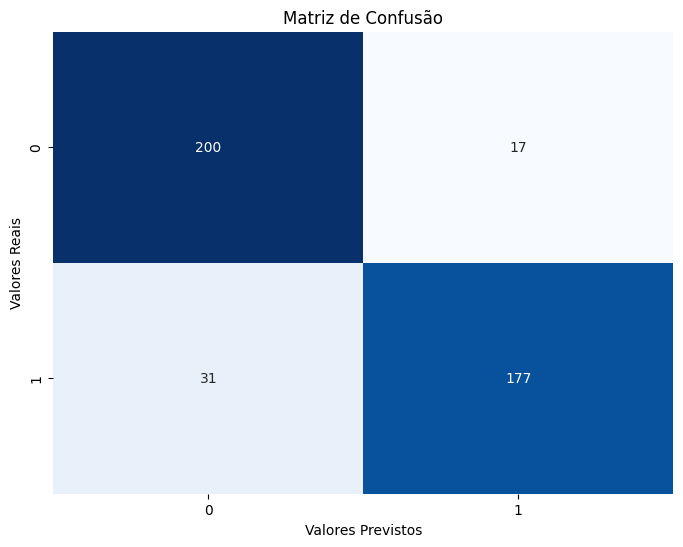


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       217
           1       0.91      0.85      0.88       208

    accuracy                           0.89       425
   macro avg       0.89      0.89      0.89       425
weighted avg       0.89      0.89      0.89       425



In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


# Fazer previsões com o modelo SVM já treinado
y_pred = svm_model.predict(X_test)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.show()

# Exibir o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


In [54]:
# Identificar índices onde as previsões foram incorretas
incorrect_predictions = X_test[y_test != y_pred]

# Analisar esses exemplos para identificar padrões de erro
print("Exemplos onde o modelo errou:")
incorrect_predictions.head()


Exemplos onde o modelo errou:


,Idade,Coeficiente,Nota Enem,Período Desistências,Nota,Sexo_M,Escola_Publica_new,curso_new,Tipo de Cota_new
25546,0.782609,0.532515,0.637075,1.0,0.96,True,0,1,1
48360,0.391304,0.367485,0.455178,1.0,0.70,True,0,0,1
27785,0.152174,0.385481,0.230976,1.0,0.20,False,1,1,0
11370,0.195652,0.286912,0.558502,1.0,0.34,True,0,1,0
21490,0.260870,0.716564,0.682648,1.0,0.75,False,1,1,0


In [55]:
# Identificar índices onde as previsões foram incorretas
incorrect_indices = X_test.index[y_test != y_pred]

# Criar um DataFrame com as previsões incorretas
incorrect_predictions_df = pd.DataFrame({
    'Índice': incorrect_indices,
    'Valores Reais': y_test[y_test != y_pred],
    'Valores Previstos': y_pred[y_test != y_pred]
})

# Exibir os exemplos onde o modelo errou
print("Exemplos onde o modelo errou:")
incorrect_predictions_df.head()


Exemplos onde o modelo errou:


,Índice,Valores Reais,Valores Previstos
25546,25546,0,1
48360,48360,1,0
27785,27785,1,0
11370,11370,1,0
21490,21490,0,1
